# Regressão simples

$Y \approx \beta_0 + \beta_1 X$

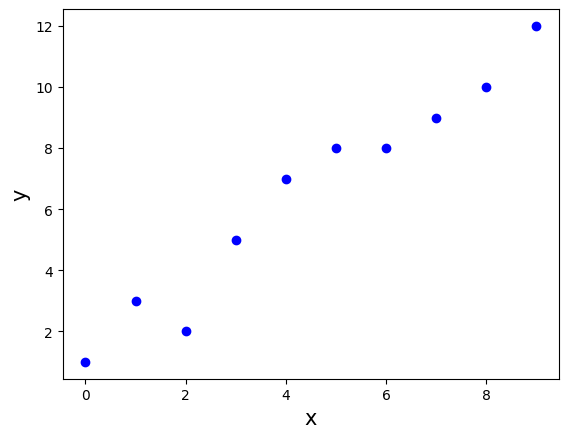

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([1,3,2,5,7,8,8,9,10,12])

plt.plot(x,y,'bo')
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.show()

In [ ]:
from statistics import variance
import math

def linear_regression(x,y):
    n = np.size(x)
    
    m_x, m_y = np.mean(x), np.mean(y)
    
    SS_xy = 0
    SS_xx = 0
    
    for i in range(0,len(x)):
        SS_xy = SS_xy + (x[i]-m_x) * (y[i]-m_y)
        SS_xx = SS_xx + (x[i]-m_x) ** 2
    
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
    
    return (b_0,b_1)

def plot_regression_line(x,y,b):
    
    plt.scatter(x,y,color="b", marker = "o", s=50)
    
    y_pred = b[0]+b[1]*x
    
    plt.plot(x,y_pred,color='r')
    
    plt.xlabel('x',fontsize=15)
    plt.ylabel('y',fontsize=15)
    plt.show()

Coeficientes estimados:  1.2363636363636363 1.1696969696969697


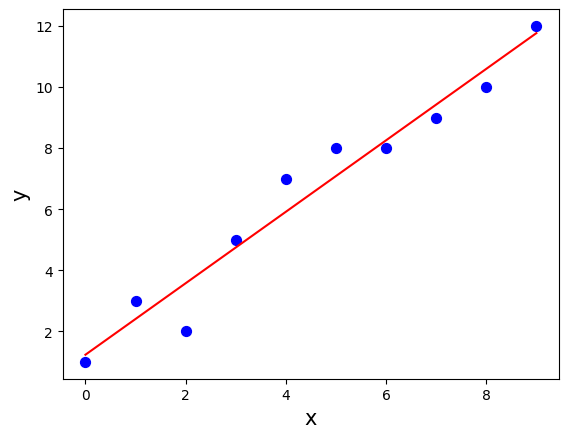

In [ ]:
b = linear_regression(x,y)
print("Coeficientes estimados: ", b[0], b[1])
plot_regression_line(x,y,b)

In [ ]:
def RSE(x,y,b):
    n = len(y)
    RSE = 0
    for i in range(0,n):
        y_pred = b[0]+x[i]*b[1]
        RSE = RSE + (y[i]-y_pred)**2
    RSE = math.sqrt(RSE/(n-2))
    return RSE

print('RSE: ',RSE(x,y,b))

RSE:  0.8384690232980003


In [ ]:
def R2(x,y,b):
    n = len(y)
    
    C1 = 0
    C2 = 0
    ym = np.mean(y)
    
    for i in range(0,n):
        y_pred = b[0]+x[i]*b[1]
        C1 = C1 +(y[i]-y_pred)**2
        C2 = C2 + (y[i]-ym)**2
        
    R2 = 1 - C1/C2
    return R2

print('R2:', R2(x,y,b))

R2: 0.952538038613988


# Regressão linear Múltipla

In [ ]:
import pandas as pd

data = pd.read_csv('BostonHousing.csv',header=(0))

ylabel = data.columns[-1]
print("Número de linhas e colunas: ", data.shape)
data.head(10)

Número de linhas e colunas:  (506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [ ]:
data = data.to_numpy()
nrow, ncol = data.shape
y = data[:,-1]
x = data[:,0:-1]

In [ ]:
from sklearn.model_selection import train_test_split

p = 0.2
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = p, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train,y_train)

y_pred = lm.predict(x_test)

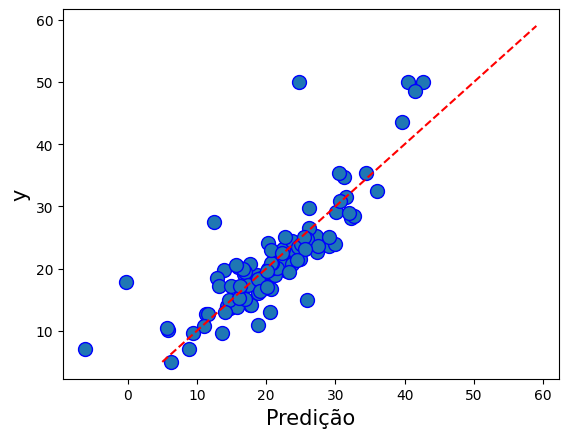

In [ ]:
l = plt.plot(y_pred,y_test,'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor = 'C0')


plt.ylabel("y",fontsize =15)
plt.xlabel('Predição', fontsize=15)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl,yl,'r--')

plt.show()

In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
print("R2:",R2)

R2: 0.6687594935356274


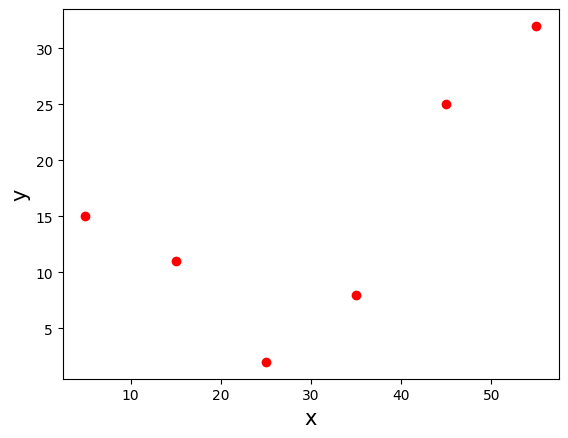

In [ ]:
x = np.array([5,15,25,35,45,55])
y = np.array([15,11,2,8,25,32])

plt.plot(x,y,'ro')
plt.ylabel('y',fontsize=15)
plt.xlabel('x',fontsize=15)

plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(degree = 2, include_bias=False)
x_ = x.reshape((-1,1))
transformer.fit(x)
print('Dados originais: \n',x)

Dados originais: 
 [[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]


In [ ]:
model = LinearRegression().fit(x_,y)
y_pred = model.predict(x_)

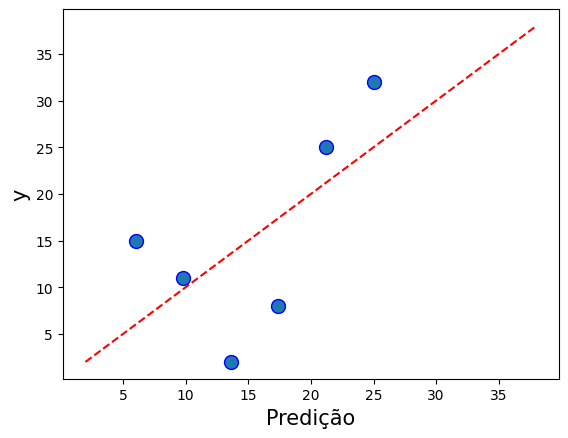

In [ ]:
l = plt.plot(y_pred,y,'bo')
plt.setp(l,markersize=10)
plt.setp(l, markerfacecolor = 'C0')

plt.ylabel("y", fontsize = 15)
plt.xlabel("Predição",fontsize =15)

xl = np.arange(min(y),1.2*max(y), (max(y)-min(y))/10)

yl = xl
plt.plot(xl,yl,'r--')

plt.show()

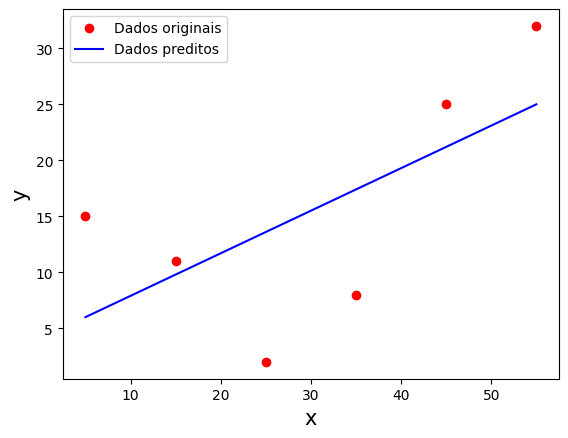

In [ ]:
plt.plot(x,y, 'ro', label='Dados originais')
plt.plot(x,y_pred,'b-', label = 'Dados preditos')
plt.ylabel("y", fontsize=15)
plt.xlabel("x",fontsize=15)
plt.legend()
plt.show()

In [ ]:
import random

random.seed(30)

data = pd.read_csv('iris.csv',header=(0))

data.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [ ]:
classes = np.array(pd.unique(data[data.columns[-1]]),dtype=str)

atributos = list(data.columns)

data = data.to_numpy()

y = data[:,-1]
x = data[:,0:-1]


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)

x = scaler.transform(x)


In [ ]:
print("Média: ", np.mean(x, axis=0))
print("Desvio Padrão: ", np.std(x,axis=0))

Média:  [-4.73695157e-16 -7.81597009e-16 -4.26325641e-16 -4.73695157e-16]
Desvio Padrão:  [1. 1. 1. 1.]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = p)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
model = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print('Acurácia: ',score)

Acurácia:  0.9666666666666667


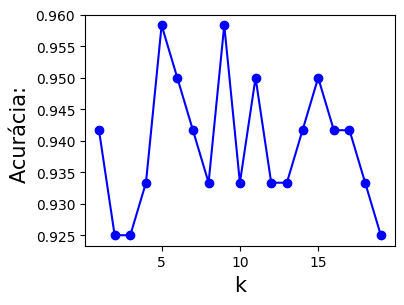

Melhor k: 5
Acurácia:  0.9666666666666667


In [ ]:
from sklearn.model_selection import cross_validate

nkf = 5
vk = []
vscore = []

for k in range(1,20):
    model = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    
    cv = cross_validate(model, x_train,y_train, cv=nkf)
    vscore.append(cv['test_score'].mean())
    
    vk.append(k)

plt.figure(figsize = (4,3))
plt.plot(vk,vscore,'-bo')
plt.xlabel('k',fontsize=15)
plt.ylabel('Acurácia: ', fontsize=15)
plt.show()

best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)
print('Acurácia: ', np.max(score))

In [ ]:
model = KNeighborsClassifier(n_neighbors = best_k,metric = 'euclidean')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Acurácia: ", accuracy_score(y_pred,y_test))

Acurácia:  0.9666666666666667


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(solver = 'lbfgs', max_iter =1000)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Acurácia: ', model.score(x_test,y_test))

Acurácia:  0.9666666666666667


In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print('Acurácia: ', model.score(x_test,y_test))

Acurácia:  0.9666666666666667


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


dados = pd.read_csv('Advertising.csv')
dados = dados.dropna()
dados = dados.drop(dados.columns[[0]], axis=1) # remove primeira coluna

ylabel = dados.columns[-1]
list_label = list(dados.columns)
dados.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [ ]:
from sklearn.model_selection import train_test_split

p=0.2

dados = dados.to_numpy()

X = dados[:,0:-1]
y = dados[:,-1]
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=p, random_state=42)

In [ ]:
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.metrics import mean_squared_error

rid = Ridge(alpha = 1)
rid.fit(x_train,y_train)
y_pred = rid.predict(x_test)
RSME = mean_squared_error(y_test, y_pred)
print("RSME: ", RSME)

RSME:  3.174094812092733


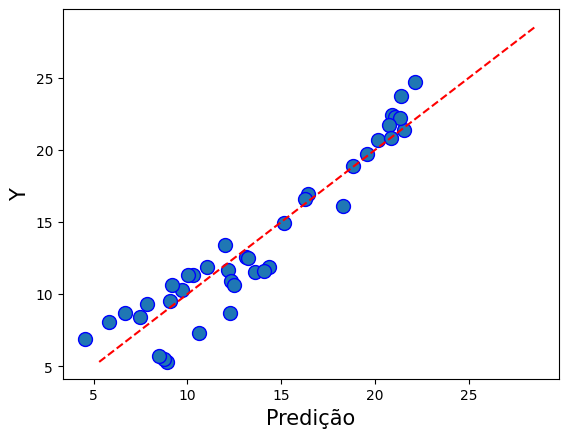

In [ ]:
fig = plt.figure()
l = plt.plot(y_pred,y_test, 'bo')
plt.setp(l,markersize = 10)
plt.setp(l,markerfacecolor = 'C0')

plt.ylabel("Y", fontsize = 15)
plt.xlabel('Predição', fontsize = 15)

xl = np.arange(min(y_test), 1.2*max(y_test), (max(y_test)-min(y_test))/10)
yl = xl

plt.plot(xl,yl, 'r--')
plt.show()

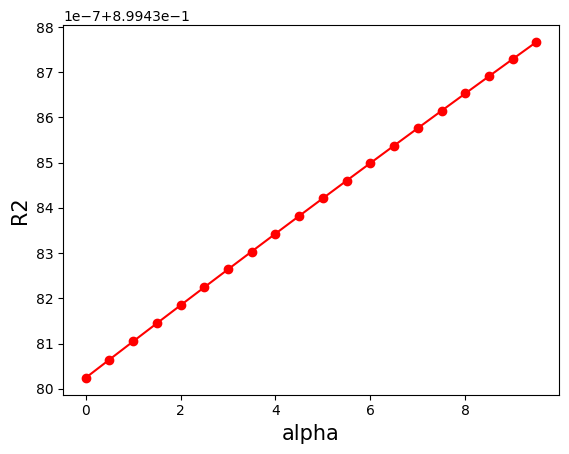

In [ ]:
from sklearn.metrics import r2_score

vr = []
valpha = []

for alpha in np.arange(0,10,0.5):
    rid = Ridge(alpha = alpha)
    rid.fit(x_train,y_train)
    y_pred = rid.predict(x_test)
    
    r2 = r2_score(y_test,y_pred)
    vr.append(r2)
    valpha.append(alpha)

plt.plot(valpha, vr,'-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel('R2', fontsize = 15)
plt.show()

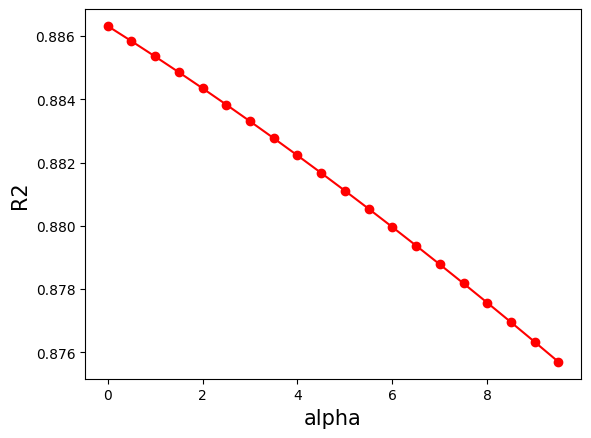

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)
X1 = scaler.transform(x_train)

scaler = StandardScaler().fit(x_test)
X2 = scaler.transform(x_test)

vr = []
valpha = []

for alpha in np.arange(0,10,0.5):
    rid = Ridge(alpha = alpha)
    rid.fit(X1,y_train)
    y_pred = rid.predict(X2)
    
    r2 = r2_score(y_test,y_pred)
    vr.append(r2)
    valpha.append(alpha)

plt.plot(valpha, vr,'-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel('R2', fontsize = 15)
plt.show()

In [ ]:
from sklearn.linear_model import Lasso

alpha = 0.1

lasso = Lasso(alpha = alpha)
lasso.fit(x_train,y_train)

y_pred = lasso.predict(x_test)
RSME = mean_squared_error(y_test, y_pred)
print("RSME: ", RSME)

RSME:  3.1705218127881323


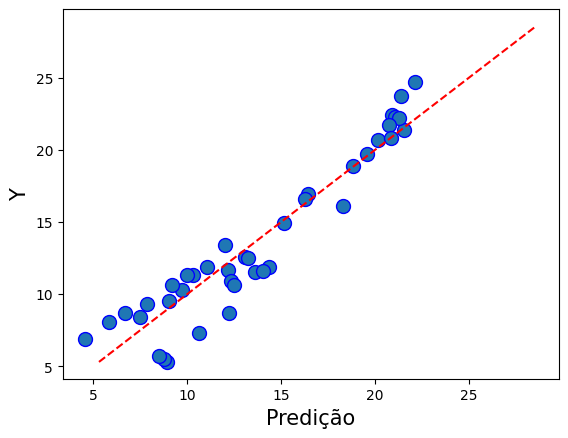

In [ ]:
fig = plt.figure()
l = plt.plot(y_pred,y_test, 'bo')
plt.setp(l,markersize = 10)
plt.setp(l,markerfacecolor = 'C0')

plt.ylabel("Y", fontsize = 15)
plt.xlabel('Predição', fontsize = 15)

xl = np.arange(min(y_test), 1.2*max(y_test), (max(y_test)-min(y_test))/10)
yl = xl

plt.plot(xl,yl, 'r--')
plt.show()